# Lorenz Attractor
A short notebook for solving the [Lorenz System](https://en.wikipedia.org/wiki/Lorenz_system) of differential equations:
$$
\displaystyle
\frac{\mathrm{d}x}{\mathrm{d}t} = \sigma(y - x), \qquad{}
\frac{\mathrm{d}y}{\mathrm{d}t} = x(\rho - z) - y, \qquad{}
\frac{\mathrm{d}z}{\mathrm{d}t} = xy - \beta z
$$
and making plots of a stream-line.

In [1]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

# The constants, by default they mean the system exhibits chaotic behaviour.
SIGMA = 10.0
RHO = 28.0
BETA = 8 / 3

# Starting and final time values.
t_init = 0
t_fin = 25
t_span = (t_init, t_fin)

# Initial values for x, y, z.
initial = [1.0, 1.0, 1.0]

In [2]:
def attractor(t, r, σ, ρ, β):
    """ For use with solve_ivp, calculates dx/dt, dy/dt, dz/dt."""
    x, y, z = r
    x_new = σ * (y - x)
    y_new = ρ * x - y - x * z
    z_new = x * y - β * z
    return[x_new, y_new, z_new]

In [3]:
# Use the scipy solver.
solution = solve_ivp(attractor,
                     t_span,
                     initial,
                     args=(SIGMA, RHO, BETA),
                     max_step = 0.01)

x, y, z = solution.y

Plotting in 2 Dimensions, projected onto the $x$-$y$ plane:

<IPython.core.display.Javascript object>


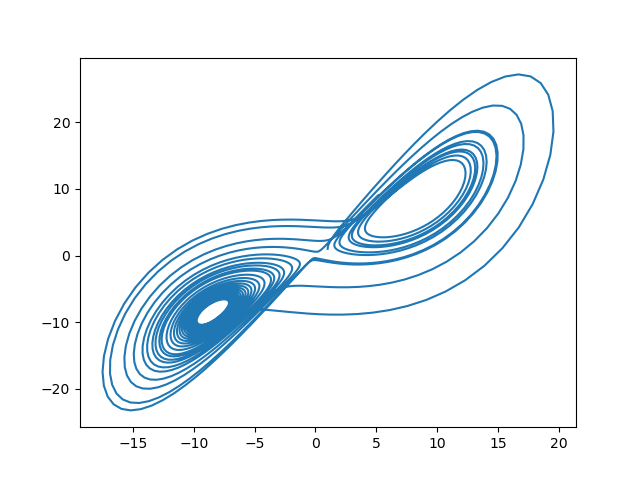

In [4]:
fig2D, ax2D = plt.subplots()
ax2D.plot(x, y)

Plotting in 3 Dimensions:

<IPython.core.display.Javascript object>


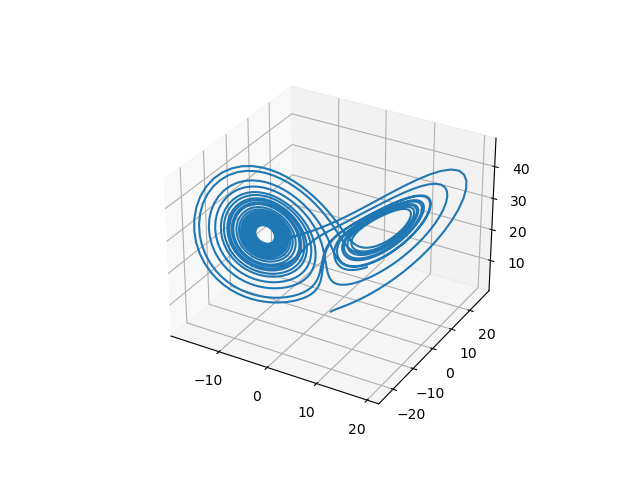

In [5]:
fig3D = plt.figure()
ax3D = fig3D.add_subplot(111, projection='3d')
ax3D.plot(x, y, z)